##***ML - Bike Rental - Linear regression and logistic regression***



#Bike Rental DB : Linear regression and logistic regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# For validation
from sklearn.model_selection import train_test_split

**Our job is to create model that predict the CNT (The total number of bike rentals) in Bike Rental company during 2011-2012**


Notebook steps:

1. EDA
2. Clean and prepare data
3. Create and prdict model
4. Evaluation result

#EDA

In [ ]:
dataset = pd.read_csv('/content/day.csv')

In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
dataset.shape

(731, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


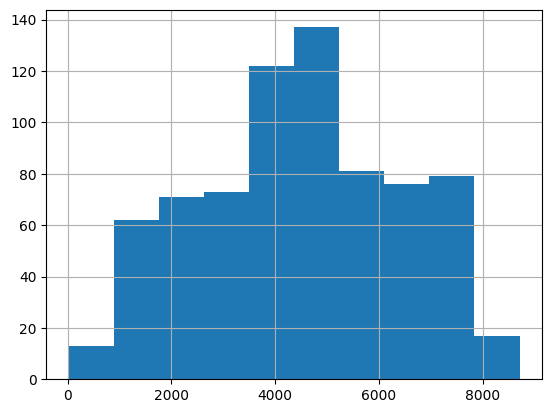

In [ ]:
dataset['cnt'].hist();

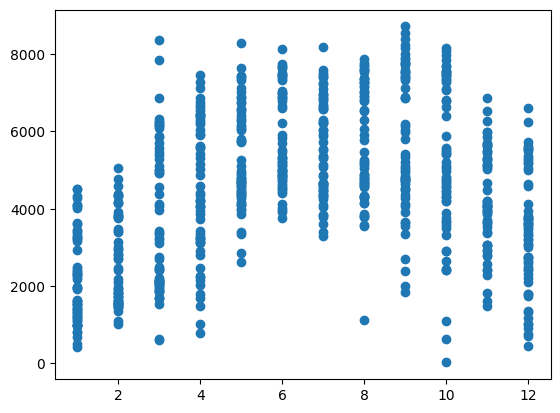

In [ ]:
plt.scatter(x=dataset['mnth'],y=dataset['cnt']);

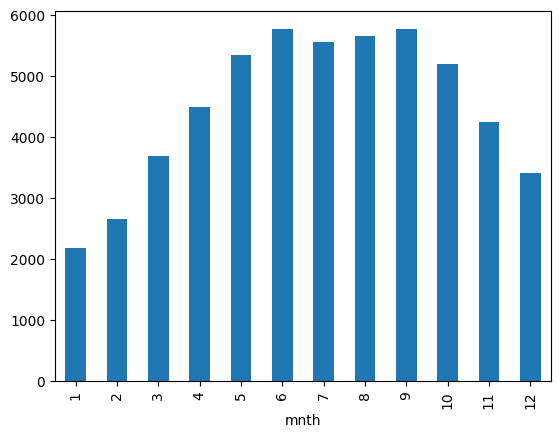

In [ ]:
dataset.groupby('mnth')['cnt'].mean().plot.bar();

#Clean and prepare data

In [ ]:
dataset['weathersit'].value_counts().sort_index()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [ ]:
dataset.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
relevent_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
dataset[relevent_columns]

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2
727,1,1,12,0,5,1,2
728,1,1,12,0,6,0,2
729,1,1,12,0,0,0,1


#Create and prdict model

## LinearRegression

Create model object

In [ ]:
model = LinearRegression()

split my data to X and y

* X = data to learn on
* y = data result


in our case:
* X = bike rental data
* y = cnt value

In [ ]:
X = dataset[relevent_columns]
y = dataset['cnt']

Split dataset to train and test

It is called Train/Test because you split the data set into two sets: a training set and a testing set.

* You train the model using the training set.
* You test the model using the testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 666)

In [ ]:
X_train.shape

(548, 7)

In [ ]:
y_train.shape

(548,)

In [ ]:
X_test.shape

(183, 7)

In [ ]:
y_test.shape

(183,)

Fit the model on the train data ONLY

In [ ]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [ ]:
test_result = model.predict(X_test)
train_result = model.predict(X_train)

In [ ]:
test_result

array([3324.8161289 , 4580.98553125, 5289.60613948, 5881.08536111,
       4245.09622958, 5075.13644075, 4598.96151055, 2831.83215709,
       5651.87182909, 7113.8475302 , 6424.37604351, 3982.74094524,
       6127.38280636, 6390.48308868, 4048.68355519, 5266.70189098,
       5238.40736283, 4181.07175984, 2091.88678709, 4822.57661589,
       4327.75554891, 2865.72511192, 4377.72644744, 4426.92095621,
       6522.36830857, 4245.84122755, 4975.97103345, 4054.9459348 ,
       4565.57154048, 6916.01970036, 6324.03749397, 7246.23573486,
       4146.67582025, 5207.02166065, 3809.15147431, 4014.79060036,
       4476.89185474, 3621.13920856, 3162.45726909, 6046.02620565,
       4426.92095621, 2290.21760169, 5881.08536111, 2699.44395243,
       4015.96374259, 4862.06179286, 3423.9815362 , 4279.0640249 ,
       6225.37507143, 4401.63666547, 3342.12195072, 6816.85429306,
        919.15298543, 3342.12195072, 5994.99460171, 5946.86079835,
       2963.71737698, 6981.96231031, 2831.32917233, 4113.95600

In [ ]:
train_result

array([4943.25122086, 5256.21616941, 6028.21739906, 3654.36200592,
       3786.24722581, 3192.930909  , 4048.68355519, 4476.89185474,
       2004.78311657, 6342.51645803, 1758.98865608, 4054.9459348 ,
       3079.02166841, 3639.61817262, 3522.47678602, 4797.29232515,
       1796.89781784, 2601.45168737, 1896.06322514, 4844.08581356,
       5930.88908694, 3523.1469435 , 6621.53371587, 1976.74966838,
       5799.00386704, 7179.79014015, 6834.83027236, 5897.66628958,
       6325.2106362 , 4762.89638556, 3162.45726909, 5897.66628958,
       4179.8986176 , 5765.78106969, 6192.15227408, 4936.48585649,
       6588.31091852, 2502.04426686, 4121.39152951, 6948.73951296,
       4179.8986176 , 2633.50134249, 3621.13920856, 7147.07032756,
       2963.05342405, 5535.40059997, 4213.12141496, 6538.34001998,
       5699.83845974, 5436.73817743, 5633.89584979, 1056.22755449,
       4345.00663485, 6358.43343356, 3095.60259687, 4466.40613318,
       2699.44395243, 4481.82012395, 5699.33547498, 2946.46629

### Evaluation result

In [ ]:
# The diffrenece between the real cnt and the model predict cnt

abs(y_train - train_result)

394    1319.251221
470    1875.783831
696    2069.217399
109     289.637994
118     808.752774
          ...     
445    1318.798434
414     823.661222
70      519.477322
429    1411.920406
236     183.961074
Name: cnt, Length: 548, dtype: float64

Check the mean error

In [ ]:
abs(y_train - train_result).mean()

1004.7337262456617

In [ ]:
abs(y_test - test_result).mean()

1071.0656108250944

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_train, train_result)

1004.7337262456617

In [ ]:
model.coef_

array([ 988.14085084, 2111.41906377,  -99.1654073 , -445.59516641,
         65.94260995,  311.73707044, -953.74491125])

Get a visial check

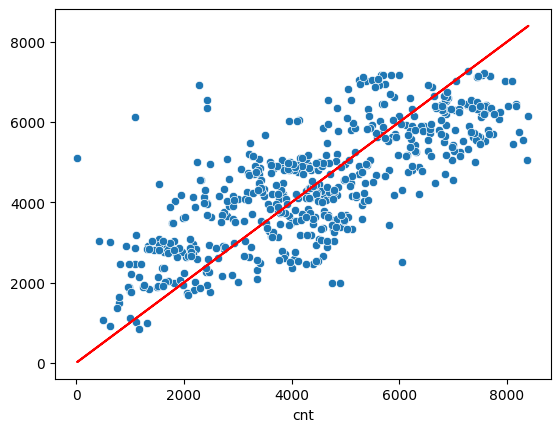

In [ ]:
ax = sns.scatterplot(x=y_train, y=train_result)
ax.plot(y_train, y_train, 'r');

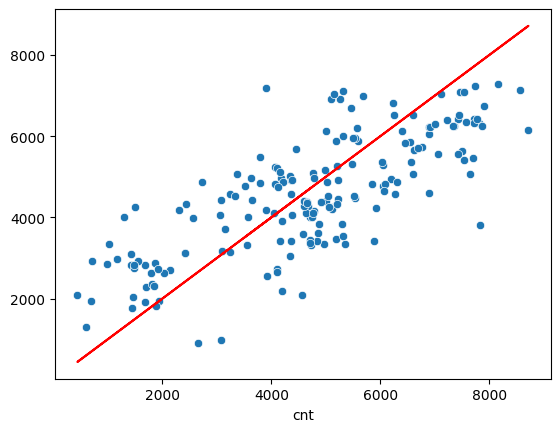

In [ ]:
ax = sns.scatterplot(x=y_test, y=test_result)
ax.plot(y_test, y_test, 'r');

Get a accuracy value

In [ ]:
# How much the model accurate till 100 CNT

result = (abs(y_train - train_result) <= 100).mean()
"{0:.3f}%".format(result)

'0.062%'

## LogisticRegression

In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
## Is higher than average cnt
dataset['is_bigger_than_avg'] = dataset['cnt'] > 4504

In [ ]:
dataset['is_bigger_than_avg']

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: is_bigger_than_avg, Length: 731, dtype: bool

In [ ]:
dataset['is_bigger_than_avg'].mean()

0.5088919288645691

split my data to X and y

In [ ]:
X = dataset[['season','yr','mnth','holiday','weekday','workingday','weathersit']]
y = dataset['is_bigger_than_avg']

Split dataset to train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 666)

Fit the model on the train data ONLY

In [ ]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [ ]:
train_result = model.predict(X_train)
test_result = model.predict(X_test)

In [ ]:
train_result

array([ True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

###Evaluation result

In [ ]:
# result accuracy
(y_train == train_result).mean()

0.7645985401459854

In [ ]:
(y_test == test_result).mean()

0.6885245901639344

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, test_result)

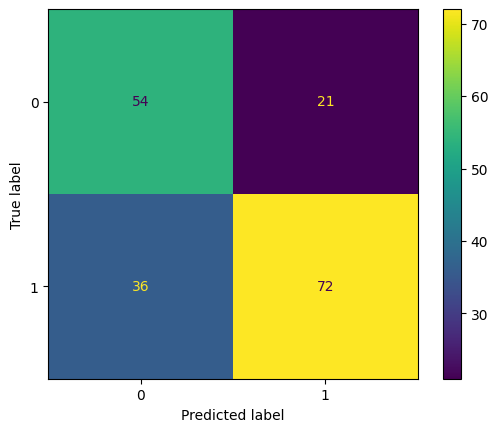

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
(54+72) / 183

0.6885245901639344

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import warnings

# For validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import pydot
from sklearn.tree import export_graphviz
from io import StringIO

In [ ]:
relevent_columns = ['mnth','weekday','workingday','weathersit']
dataset[relevent_columns]

In [ ]:
dt = DecisionTreeClassifier(
    max_depth=10,
    class_weight='balanced')

In [ ]:
X = dataset[relevent_columns]
y = dataset['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [ ]:
X_train.shape

(548, 4)

In [ ]:
y_train.shape

(548,)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [ ]:
y_prdict = dt.predict(X_test)

In [ ]:
abs(y_prdict - y_test).mean()

1873.327868852459

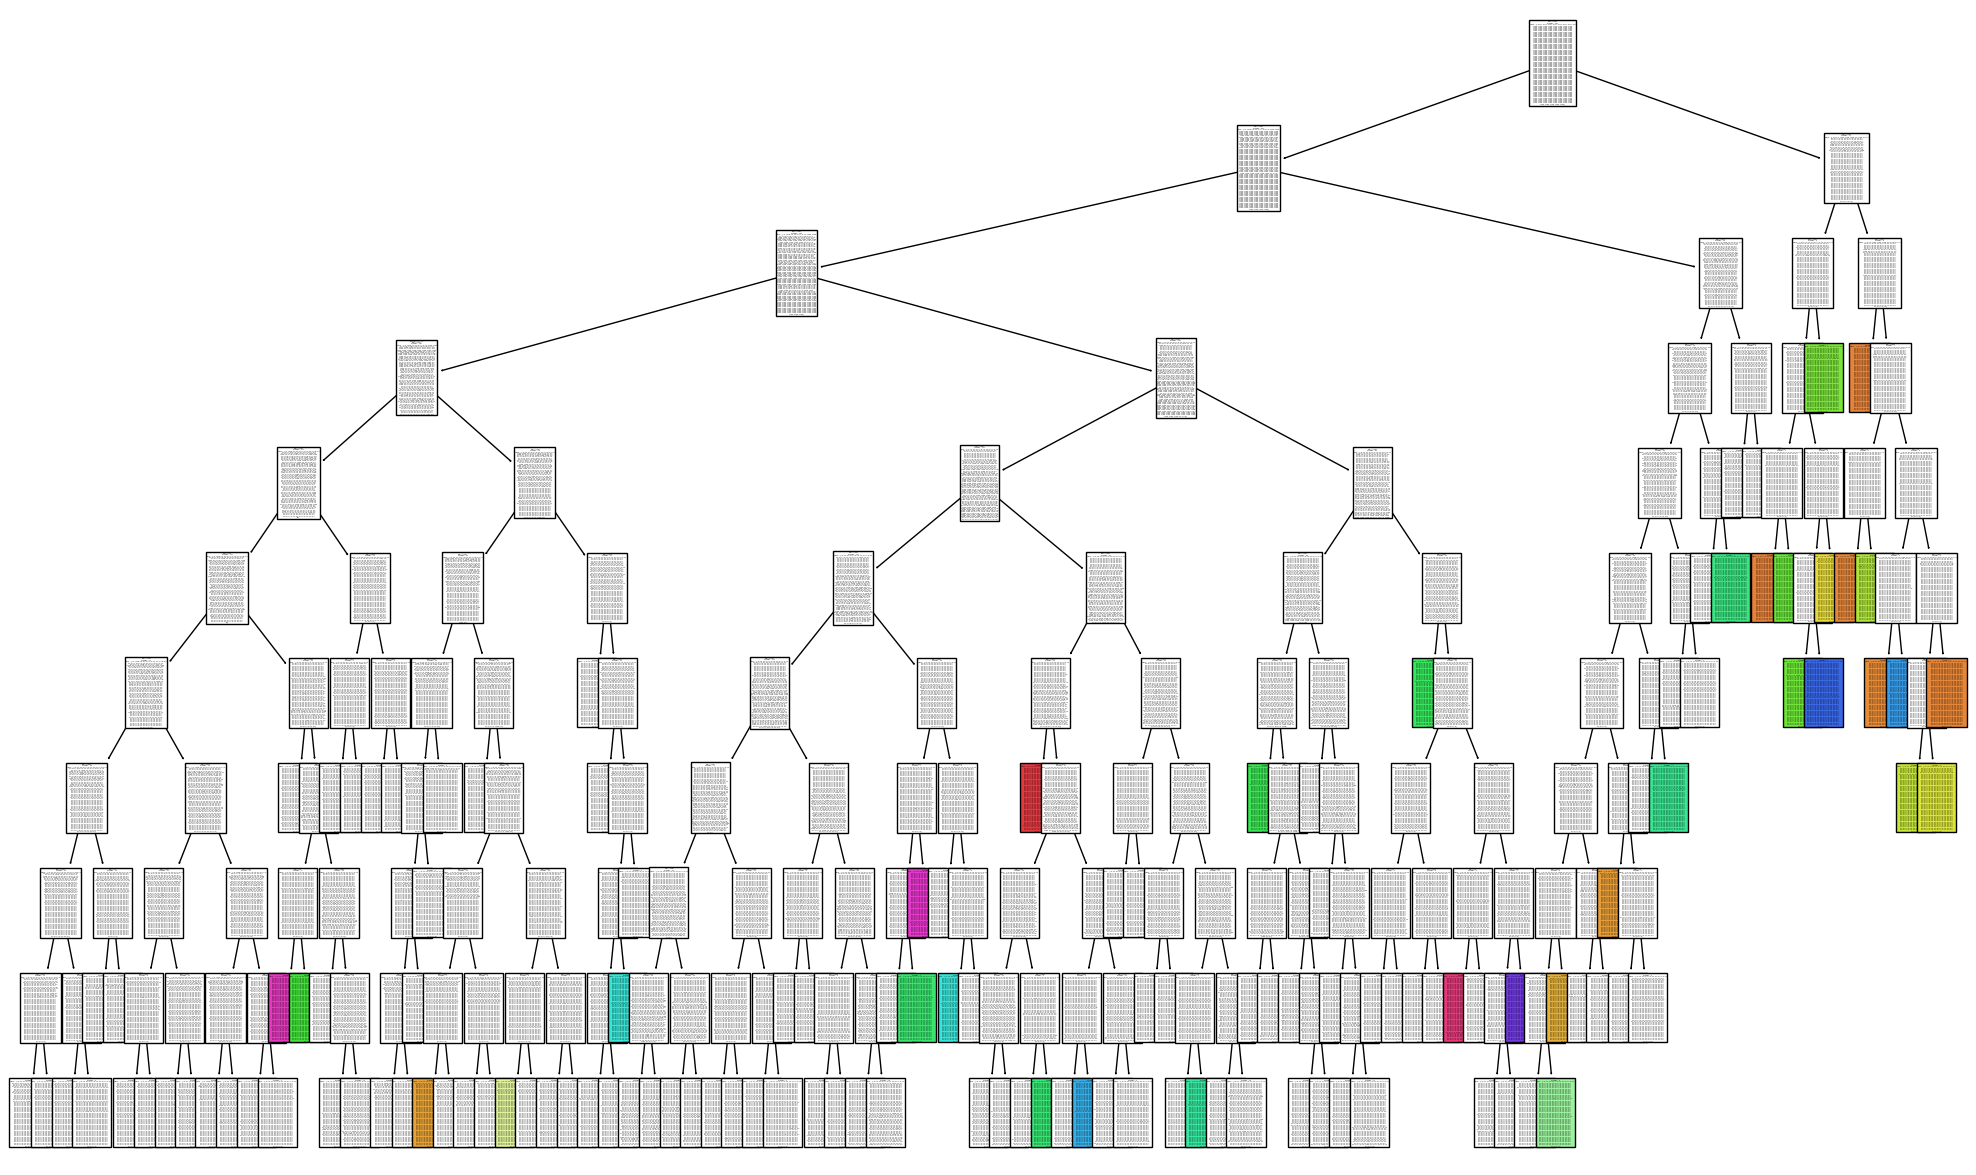

In [ ]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt,
                feature_names = X_train.columns,
                filled = True);